1) Instalar e importar a biblioteca dlib, além de todas as outras bibliotecas necessárias;

In [1]:
#Realizando as Importações
from PIL import Image
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import dlib

2) Carregar o detector de faces da dlib;

3) Fazer upload do modelo. (Modelo escolhido foi o de 5)

4) Carregar uma imagem

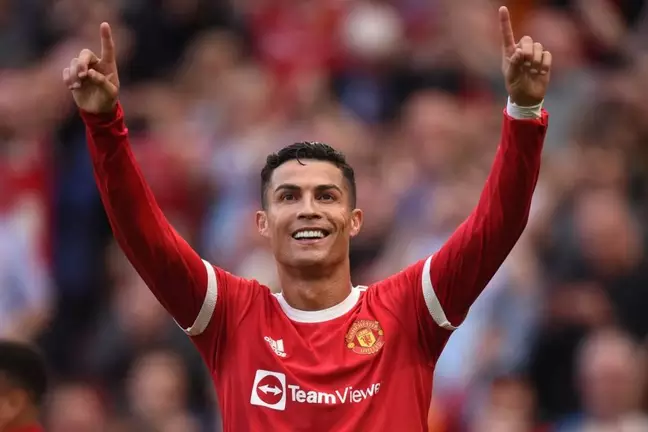

In [2]:
foto = cv.imread('cristiano.png')#Função para carregar a imagem e atribui-la para uma variável

cv2_imshow(foto)#Função para exibir a imagem

5) Chamar o detector de faces da dlib, detectar todas as faces da imagem escolhida, encontrando o retângulo envolvente ao redor de cada face. 

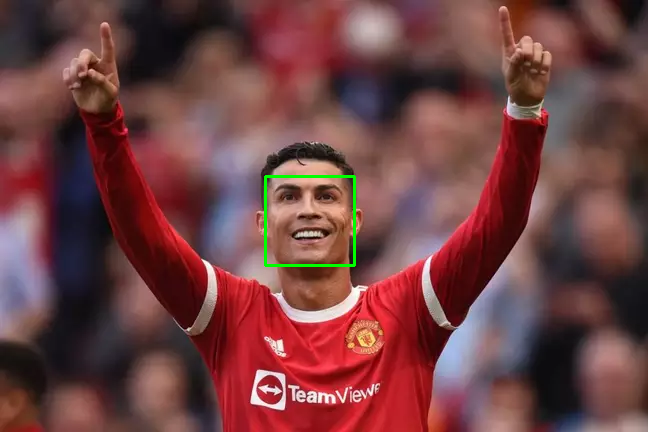

In [14]:
# Carrega o detector de faces da dlib. 
detector_face = dlib.get_frontal_face_detector()

foto = cv.imread('cristiano.png')
reconhecimento = detector_face(foto, 1)
for rosto in reconhecimento:
  l, t, r, b = rosto.left(), rosto.top(), rosto.right(), rosto.bottom()
  cv.rectangle(foto, (l,t), (r, b), (0,255,0), 2)


cv2_imshow(foto)

6) A partir dos retângulos envolventes das faces encontradas, chamar o detector de marcos faciais de cada face, e desenhar um círculo VERMELHO em cima de cada marco facial;

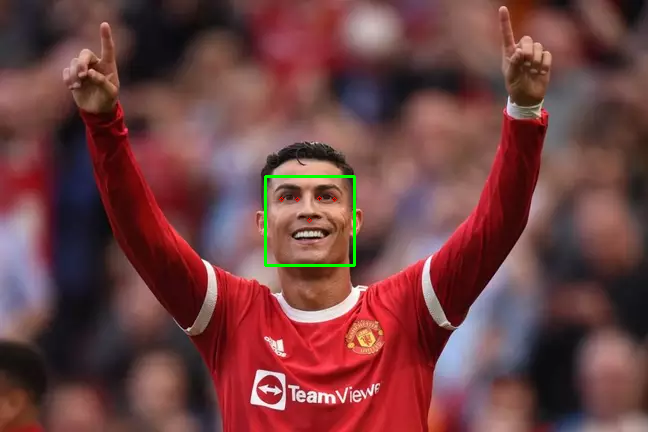

In [21]:
# Carrega o detector de marcos faciais da dlib (Modelo escolhido: 5):
detector_pontos = dlib.shape_predictor('shape_predictor_5_face_landmarks.dat')

imagem2 = cv.imread('cristiano.png')

reconhecimento = detector_face(imagem2, 1)
for rosto in reconhecimento:

  pontos = detector_pontos(imagem2, rosto)
 
  for ponto in pontos.parts():
    cv.circle(imagem2, (ponto.x, ponto.y), 2, (0,0,255), 1)
  l, t, r, b = rosto.left(), rosto.top(), rosto.right(), rosto.bottom()
  cv.rectangle(imagem2, (l,t), (r, b), (0,255,0), 2)


cv2_imshow(imagem2)



7) Depois de encontrar os marcos faciais, desenhar um círculo centrado no ponto médio da face,

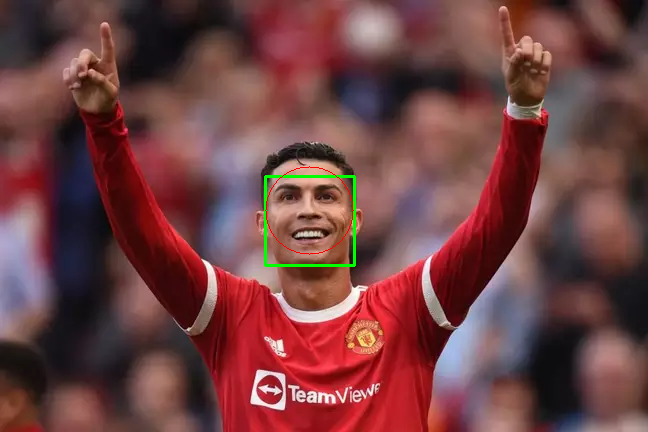

In [20]:
detector_face = dlib.get_frontal_face_detector()

deteccoes = detector_face(foto, 1)
for rosto in deteccoes:
  l, t, r, b = rosto.left(), rosto.top(), rosto.right(), rosto.bottom()

  #Cria o circulo baseado no ponto médio da face
  cv.circle(foto, ((l+r)//2, (t+b)//2), (r-l)//2, (0,0,255))

  cv2_imshow(foto)